# Predictive Modelling for H1b Visa Approval

## Importing the Libraries

In [1]:
# 1.1 ) Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import plot


## Data Preprocessing

In [2]:
# 1.2) Read the dataset

data=pd.read_csv('h1b_kaggle.csv')
data

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003
...,...,...,...,...,...,...,...,...,...,...,...
3002453,3002454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NYC, NEW YORK",-74.005941,40.712784
3002454,3002455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SOUTH LAKE, TEXAS",-97.134178,32.941236
3002455,3002456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CLINTON, NEW JERSEY",-74.909890,40.636768
3002456,3002457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"OWINGS MILL, MARYLAND",-76.780253,39.419550


In [3]:
# data.inspection
data.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [4]:
data.tail()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
3002453,3002454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NYC, NEW YORK",-74.005941,40.712784
3002454,3002455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SOUTH LAKE, TEXAS",-97.134178,32.941236
3002455,3002456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CLINTON, NEW JERSEY",-74.909890,40.636768
3002456,3002457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"OWINGS MILL, MARYLAND",-76.780253,39.419550
3002457,3002458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ALTANTA, GEORGIA",-84.387982,33.748995


In [5]:
# Descriptive Analysis
data.describe()

,Unnamed: 0,PREVAILING_WAGE,YEAR,lon,lat
count,3.002458e+06,3.002373e+06,3.002445e+06,2.895216e+06,2.895216e+06
mean,1.501230e+06,1.469984e+05,2.013855e+03,-9.213441e+01,3.816054e+01
std,8.667351e+05,5.287609e+06,1.680612e+00,1.965591e+01,4.672835e+00
min,1.000000e+00,0.000000e+00,2.011000e+03,-1.578583e+02,1.343719e+01
25%,7.506152e+05,5.437100e+04,2.012000e+03,-1.119261e+02,3.416536e+01
50%,1.501230e+06,6.502100e+04,2.014000e+03,-8.615862e+01,3.910312e+01
75%,2.251844e+06,8.143200e+04,2.015000e+03,-7.551381e+01,4.088374e+01
max,3.002458e+06,6.997607e+09,2.016000e+03,1.457298e+02,6.483778e+01


In [6]:
# checking the dataype of the parameters(Columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   CASE_STATUS         object 
 2   EMPLOYER_NAME       object 
 3   SOC_NAME            object 
 4   JOB_TITLE           object 
 5   FULL_TIME_POSITION  object 
 6   PREVAILING_WAGE     float64
 7   YEAR                float64
 8   WORKSITE            object 
 9   lon                 float64
 10  lat                 float64
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ MB


In [7]:
print("The shape of the dataset is {}".format(data.shape))

The shape of the dataset is (3002458, 11)


In [8]:
print("There were around {} applications for H-1B Visa from 2011 to 2016.".format(data.shape[0]))

There were around 3002458 applications for H-1B Visa from 2011 to 2016.


# Checking the null values

In [9]:
# Checking the null values in dataset
data.isnull().any()

Unnamed: 0            False
CASE_STATUS            True
EMPLOYER_NAME          True
SOC_NAME               True
JOB_TITLE              True
FULL_TIME_POSITION     True
PREVAILING_WAGE        True
YEAR                   True
WORKSITE              False
lon                    True
lat                    True
dtype: bool

## Perform Visualizations

Univariate Analysis

Bi-Variate Analysis

Multi-Variate Analysis

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'PREVAILING_WAGE'}>],
       [<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'lon'}>],
       [<Axes: title={'center': 'lat'}>, <Axes: >]], dtype=object)

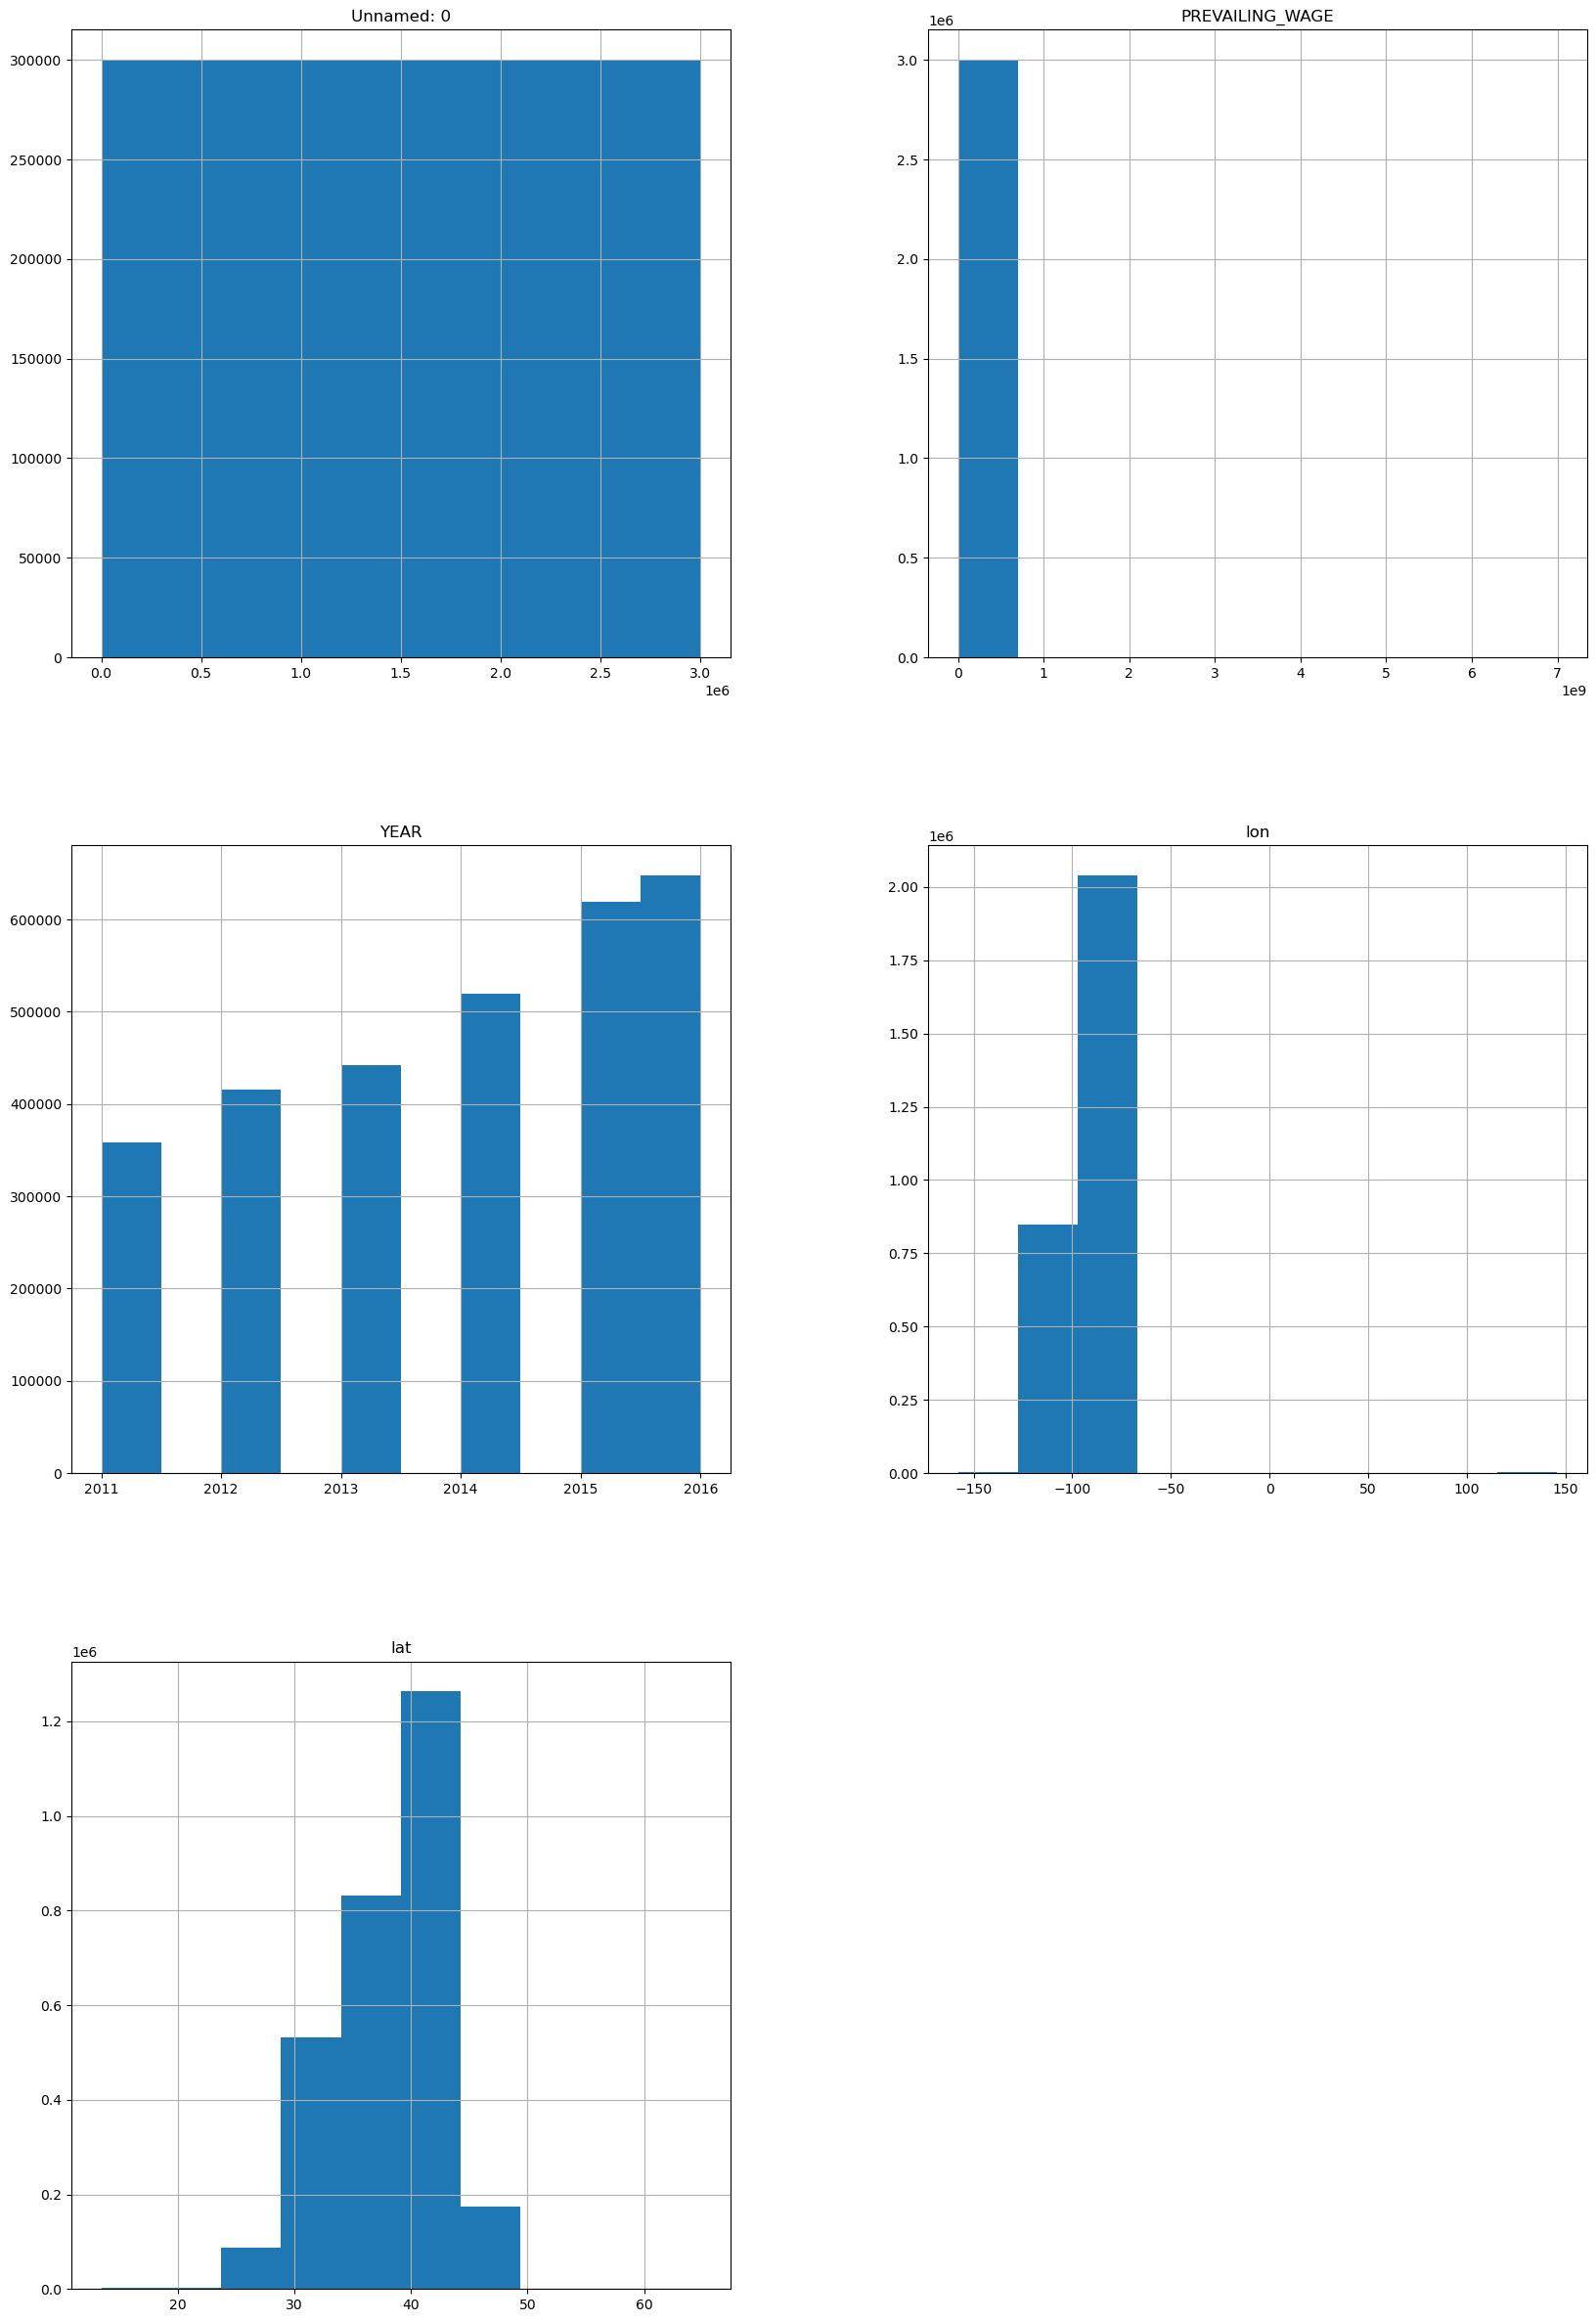

In [10]:
#Univariate Analysis
#Histogram
data.hist(figsize=(20,30))

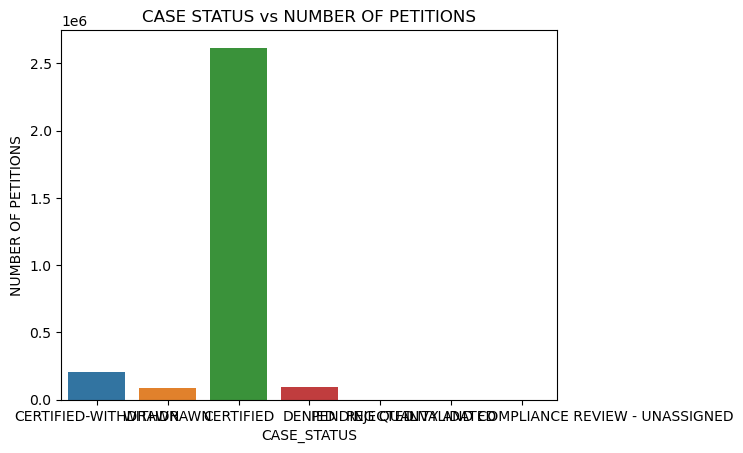

In [11]:
#Bivariate Analysis
# bar plot
sns.countplot(data=data, x='CASE_STATUS')
plt.title('CASE STATUS vs NUMBER OF PETITIONS')
plt.xlabel('CASE_STATUS')
plt.ylabel('NUMBER OF PETITIONS')
plt.show()

C:\Users\ramya\AppData\Local\Temp\ipykernel_2392\2056294179.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


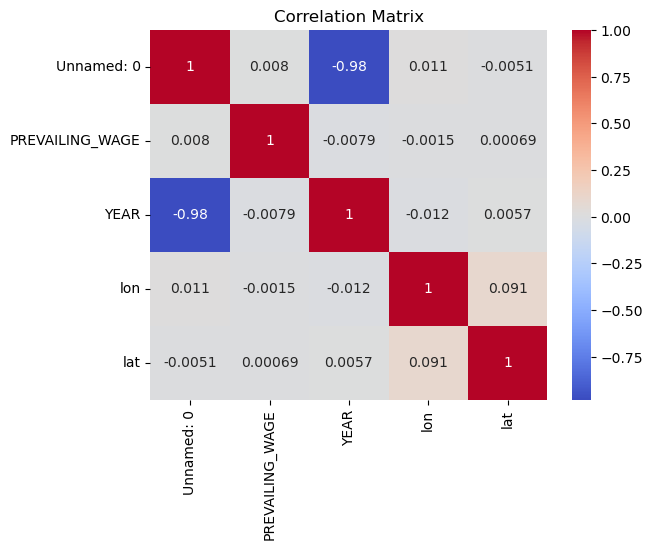

In [12]:
# Multivariate Analysis
# Heatmap of correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='YEAR', ylabel='PREVAILING_WAGE'>

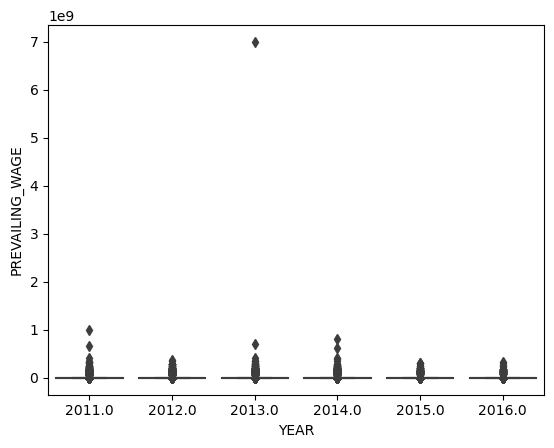

In [13]:
sns.boxplot(x='YEAR',y='PREVAILING_WAGE',data=data)

# Analysing the dataset

In [14]:
# 1.3)Analyze the dataset

data.CASE_STATUS.value_counts()

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

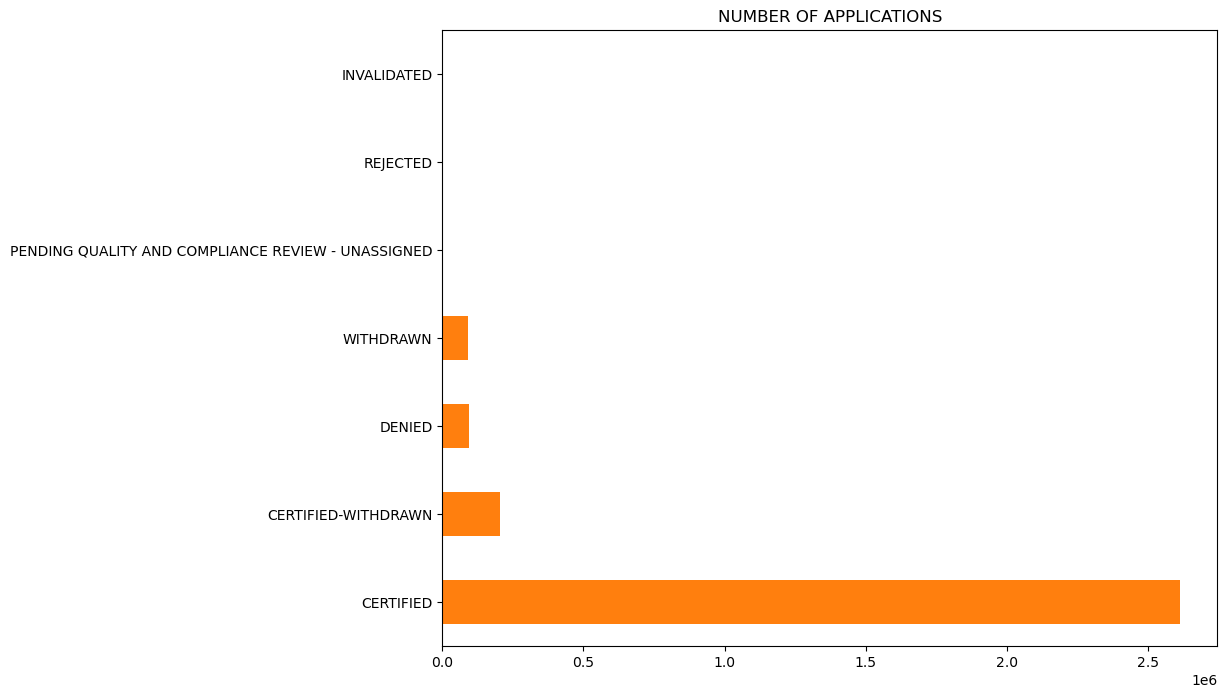

In [15]:
plt.figure(figsize=(10,8))
data.CASE_STATUS.value_counts().plot(kind='barh',color='C1')
data.sort_values('CASE_STATUS')
plt.title("NUMBER OF APPLICATIONS")
plt.show()

####  •  From the above graph we can say that the employees who have applied for the H-1B Visa were more than 2500000 whose application got certified and there were more than 200000 whose application's were certified and withdrawn and there were around 90000 whose application's were denied and there we around 80000 were withdrawn

# Number of Applications per year

<Axes: >

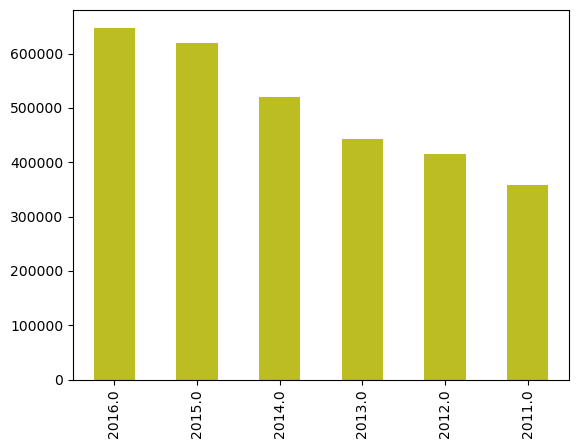

In [16]:
data.YEAR.value_counts().plot(kind = 'bar',color='C8')



####    • We can that there is an exponential increase in the number of applications as the year passes

In [17]:
data.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

### Top 10 applicants in 2011

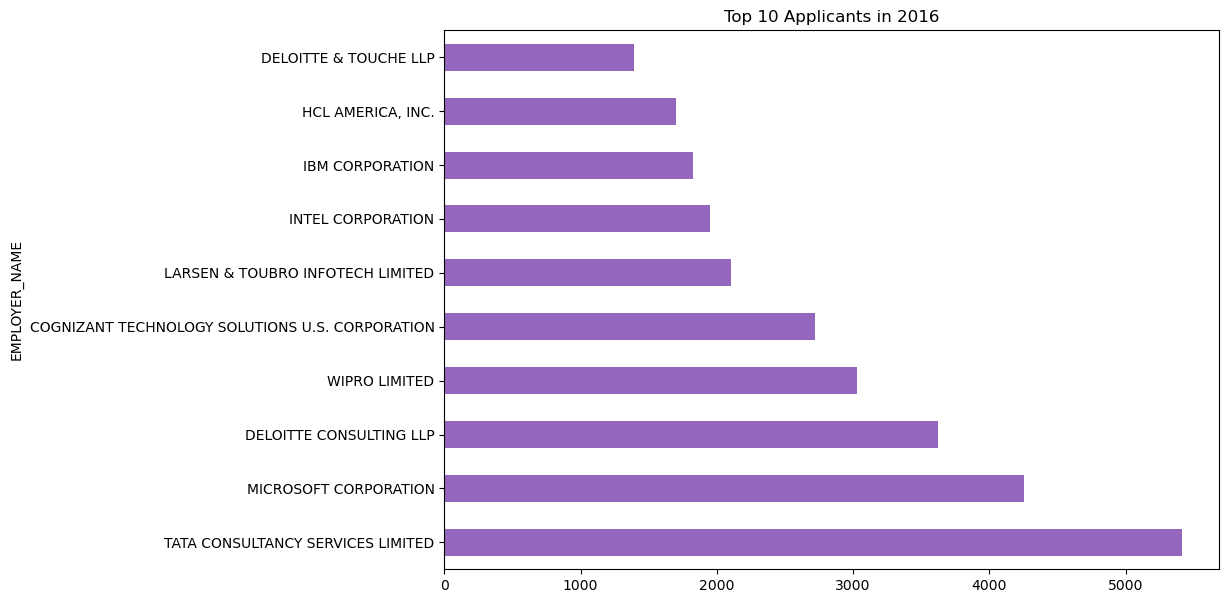

In [18]:
### Top 10 applicants in 2011

plt.figure(figsize=(10,7))

ax1 = data['EMPLOYER_NAME'][data['YEAR'] == 2011].groupby(data['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).plot(kind='barh', title = "Top 10 Applicants in 2016",
                                                                                                                           color='C14')
ax1.set_label("")
plt.show()

### Top 10 applicants in 2016

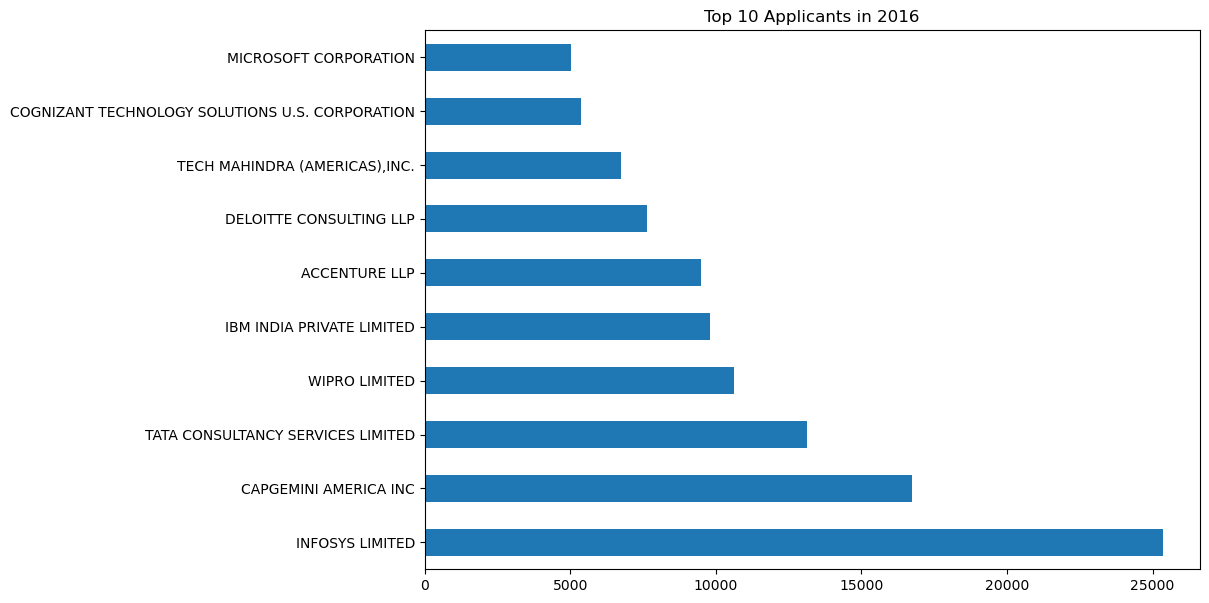

In [19]:
### Top 10 applicants in 2016

plt.figure(figsize=(10,7))

ax2 = data['EMPLOYER_NAME'][data['YEAR'] == 2016].groupby(data['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).plot(kind='barh', title='Top 10 Applicants in 2016'
                                                                                                                             ,color='C20')
ax2.set_ylabel("")
plt.show()

In [20]:
### Analyzing more number of top 10 employees

top_emp = list(data['EMPLOYER_NAME'][data['YEAR'] >= 2015].groupby(data['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).index)

byempyear = data[['EMPLOYER_NAME', 'YEAR', 'PREVAILING_WAGE']][data['EMPLOYER_NAME'].isin(top_emp)]

byempyear = byempyear.groupby([data['EMPLOYER_NAME'], data['YEAR']])

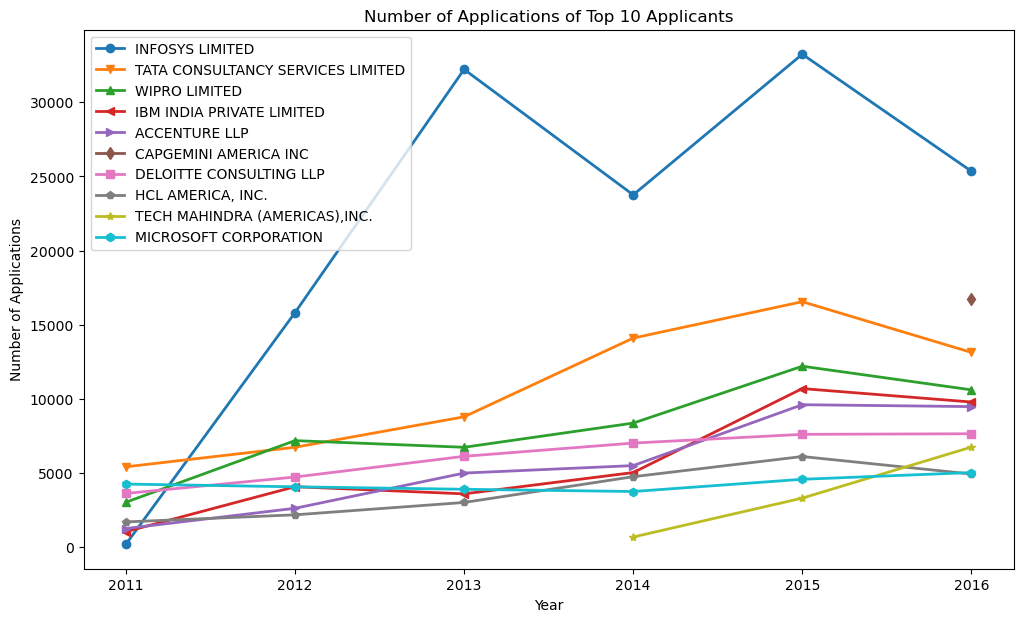

In [21]:
plt.figure(figsize=(12,7))

markers=['o','v','^','<','>','d','s','p','*','h','x','D','o','v','^','<','>','d','s','p','*','h','x','D']

for company in top_emp:
    tmp = byempyear.count().loc[company]
    plt.plot(tmp.index.values, tmp["PREVAILING_WAGE"].values, label=company, linewidth=2,marker=markers[top_emp.index(company)])
plt.xlabel("Year")
plt.ylabel("Number of Applications")
plt.legend()
plt.title('Number of Applications of Top 10 Applicants')
plt.show()

• We can clearly see that there are 2 new companies which are TECH MAHINDRA (AMERICAS),INC. & CAPGEMINI AMERICA.

• INFOSYS showed rapid growth between the year 2011 and 2013 where it came from 0 applications to more than 30k applications.

• TATA also showed a significant growth.

• From the above plot except the 2 new comers we can say that the number of applications receving to the top 10 employer started decreasing from the year 2015.

• All very top applications are from India.

• These are the companies who filed the most number of applicaions.

C:\Users\ramya\AppData\Local\Temp\ipykernel_2392\705480231.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = byempyear.mean().loc[company]


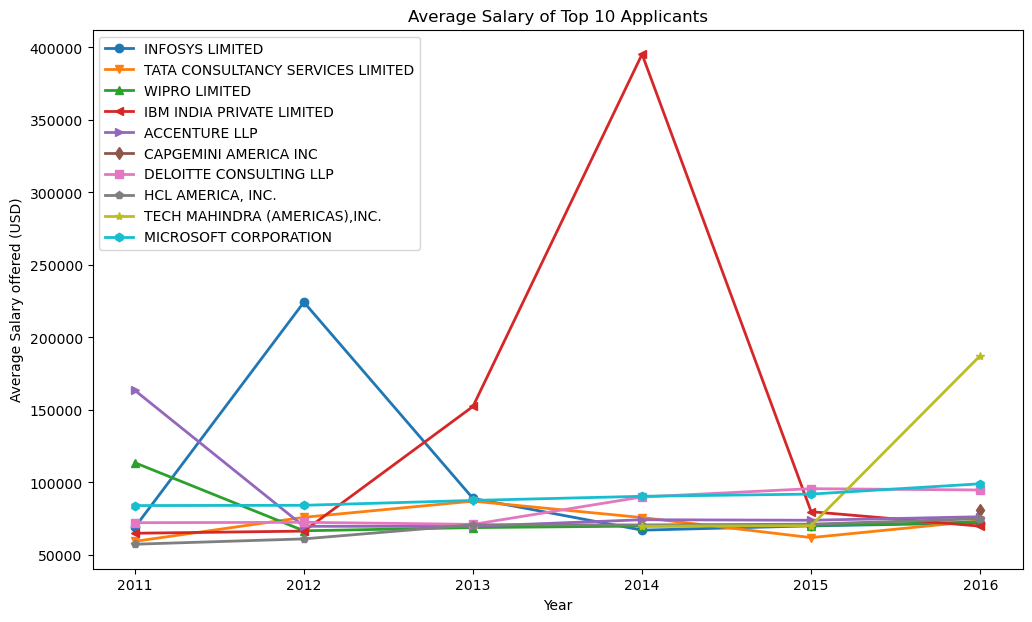

In [22]:
#### Average salary of each company

plt.figure(figsize=(12,7))

for company in top_emp:
    tmp = byempyear.mean().loc[company]
    plt.plot(tmp.index.values, tmp["PREVAILING_WAGE"].values, label=company, linewidth=2,marker=markers[top_emp.index(company)])
plt.xlabel("Year")
plt.ylabel("Average Salary offered (USD)")
plt.legend()
plt.title('Average Salary of Top 10 Applicants')
plt.show()

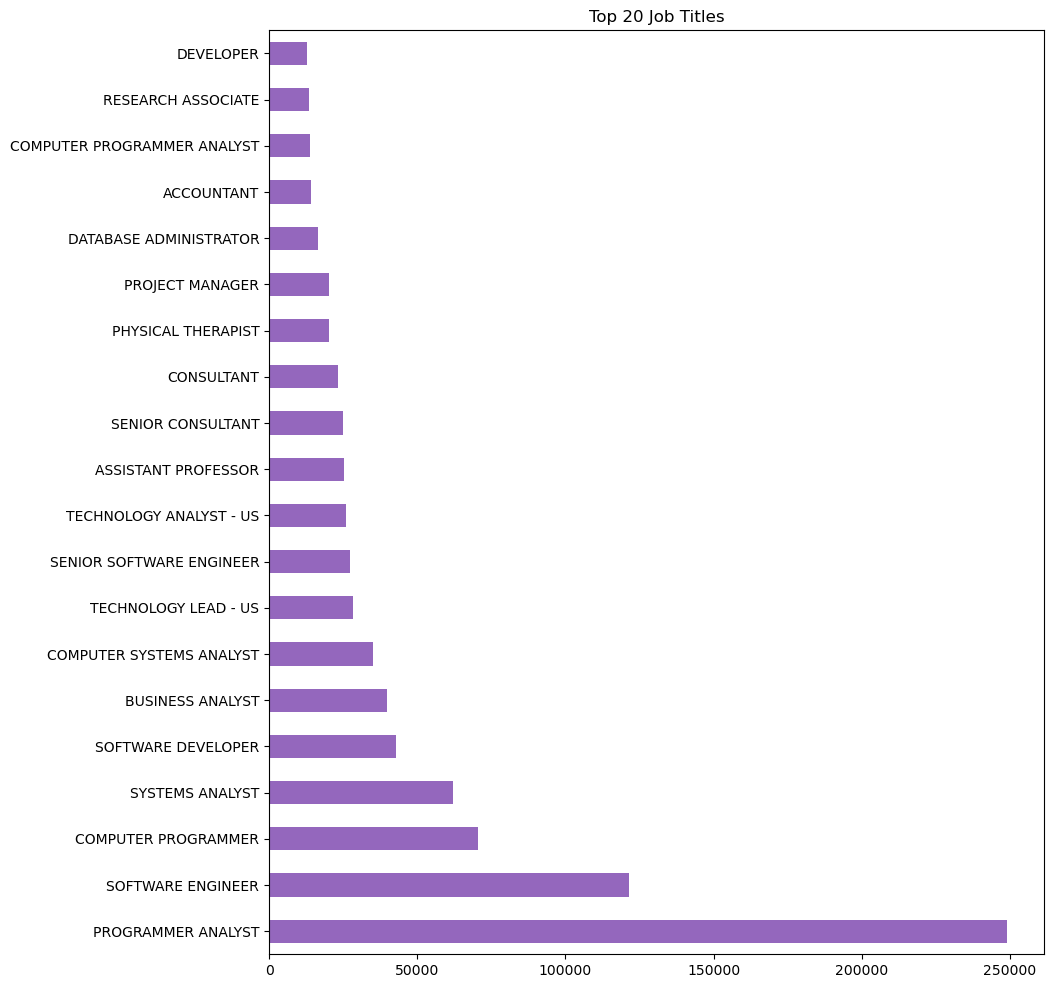

In [23]:
### Top Job tittles according to 2016

plt.figure(figsize=(10,12))
data.JOB_TITLE.value_counts().nlargest(20).plot(kind = 'barh', title = "Top 20 Job Titles",color='C4')
plt.show()

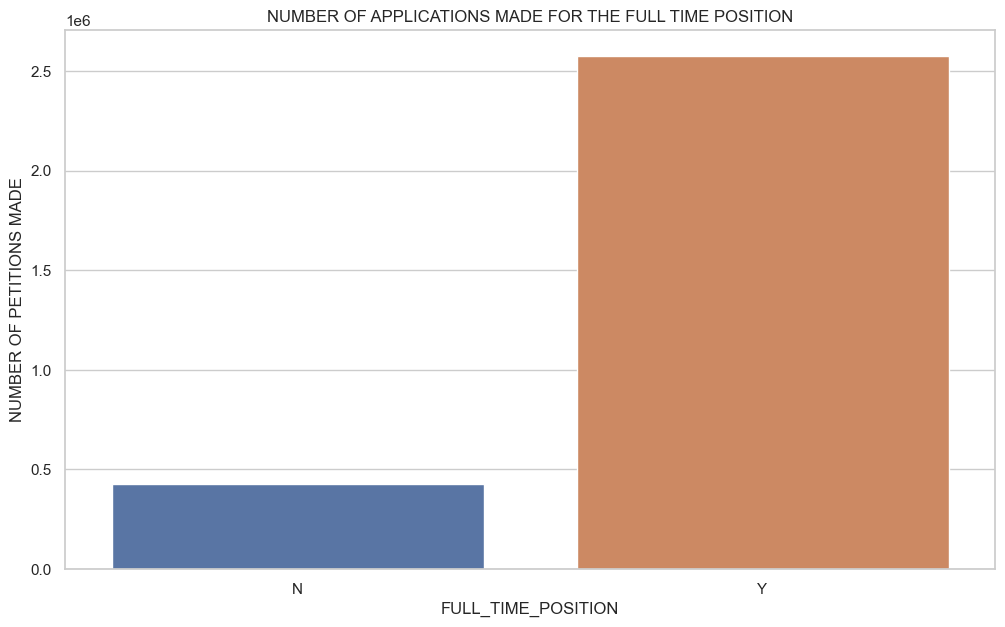

In [24]:
plt.figure(figsize=(12,7))
sns.set(style="whitegrid")
g = sns.countplot(x = 'FULL_TIME_POSITION', data = data)
plt.title("NUMBER OF APPLICATIONS MADE FOR THE FULL TIME POSITION")
plt.ylabel("NUMBER OF PETITIONS MADE")
plt.show()

##  Removing the outliers from dataset

In [25]:
data = data[data['PREVAILING_WAGE'] <= 500000]
by_emp_year = data[['EMPLOYER_NAME', 'YEAR', 'PREVAILING_WAGE']][data['EMPLOYER_NAME'].isin(top_emp)]
by_emp_year = by_emp_year.groupby([data['EMPLOYER_NAME'],data['YEAR']])

In [26]:
data.PREVAILING_WAGE.max()

499417.0

## Check for missing values in the dataset

In [27]:
data.isnull().sum()

Unnamed: 0                 0
CASE_STATUS                0
EMPLOYER_NAME             42
SOC_NAME               17698
JOB_TITLE                 26
FULL_TIME_POSITION         0
PREVAILING_WAGE            0
YEAR                       0
WORKSITE                   0
lon                   107089
lat                   107089
dtype: int64

# Label Encoding

In [28]:
### 1.4) Label encoding the CASE_sTATUS feature

In [29]:
data['SOC_NAME'] = data['SOC_NAME'].fillna(data['SOC_NAME'].mode()[0])
data.CASE_STATUS.value_counts()

C:\Users\ramya\AppData\Local\Temp\ipykernel_2392\2315231274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SOC_NAME'] = data['SOC_NAME'].fillna(data['SOC_NAME'].mode()[0])


CERTIFIED                                             2615530
CERTIFIED-WITHDRAWN                                    202650
DENIED                                                  92149
WITHDRAWN                                               89565
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

In [30]:
data.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [31]:
## similarly prerforming the same operation for FULL_TIME_POSITION

In [32]:
data.FULL_TIME_POSITION.value_counts()

Y    2573666
N     426246
Name: FULL_TIME_POSITION, dtype: int64

In [33]:
data['FULL_TIME_POSITION'] = data['FULL_TIME_POSITION'].map({'N' : 0, 'Y' : 1})
data.head()

C:\Users\ramya\AppData\Local\Temp\ipykernel_2392\2613249855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['FULL_TIME_POSITION'] = data['FULL_TIME_POSITION'].map({'N' : 0, 'Y' : 1})


,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,0,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,1,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,1,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",1,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,1,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [34]:
data['SOC_NAME'].value_counts()

Computer Systems Analysts                          308564
Computer Programmers                               226272
SOFTWARE DEVELOPERS, APPLICATIONS                  221745
COMPUTER SYSTEMS ANALYSTS                          215315
Software Developers, Applications                  192692
                                                    ...  
ELEMENTARY SCHOOL TEACHERS, EXCEPT SPECIAL EDU          1
27-3031                                                 1
HEALTH PROFESSIONALS AND TECHNICIANS, ALL OTHER         1
15-1132                                                 1
Earth Drillers, Except Oil and Gas                      1
Name: SOC_NAME, Length: 2130, dtype: int64

In [35]:
import sys
data['SOC_NAME1'] = 'others'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('computer','software')] = 'it'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('chief','management')] = 'manager'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('mechanical')] = 'mechanical'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('database')] = 'database'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('sales','market')] = 'scm'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('financial')] = 'finance'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('public','fundraising')] = 'pr'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('education','law')] = 'administrative'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('auditors','compliance')] = 'audit'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('distribution','logistics')] = 'scm'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('recruiters','human')] = 'hr'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('agricultural','farm')] = 'agri'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('construction','architectural')] = 'estate'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('forencsic','health')] = 'medical'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('teachers')] = 'education'

C:\Users\ramya\AppData\Local\Temp\ipykernel_2392\1160417267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SOC_NAME1'] = 'others'
C:\Users\ramya\AppData\Local\Temp\ipykernel_2392\1160417267.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SOC_NAME1'][data['SOC_NAME'].str.contains('computer','software')] = 'it'
C:\Users\ramya\AppData\Local\Temp\ipykernel_2392\1160417267.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

C:\Users\ramya\AppData\Local\Temp\ipykernel_2392\1160417267.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SOC_NAME1'][data['SOC_NAME'].str.contains('agricultural','farm')] = 'agri'
C:\Users\ramya\AppData\Local\Temp\ipykernel_2392\1160417267.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SOC_NAME1'][data['SOC_NAME'].str.contains('agricultural','farm')] = 'agri'
C:\Users\ramya\AppData\Local\Temp\ipykernel_2392\1160417267.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [36]:
data.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,SOC_NAME1
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,0,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826,others
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,1,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843,others
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,1,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158,others
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",1,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236,others
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,1,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003,others


In [37]:
### 1.5) Dropping the unwanted columns

data.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat', 'SOC_NAME1'],
      dtype='object')

In [38]:
data= data.drop(['Unnamed: 0', 'EMPLOYER_NAME', 'SOC_NAME','JOB_TITLE','WORKSITE', 'lon','lat'], axis = 1)

In [39]:
data.head()

,CASE_STATUS,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,SOC_NAME1
0,CERTIFIED-WITHDRAWN,0,36067.0,2016.0,others
1,CERTIFIED-WITHDRAWN,1,242674.0,2016.0,others
2,CERTIFIED-WITHDRAWN,1,193066.0,2016.0,others
3,CERTIFIED-WITHDRAWN,1,220314.0,2016.0,others
4,WITHDRAWN,1,157518.4,2016.0,others


In [40]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data.SOC_NAME1)
# print list(le.classes_)
data['SOC_N']=le.transform(data['SOC_NAME1'])

In [41]:
data.head()

,CASE_STATUS,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,SOC_NAME1,SOC_N
0,CERTIFIED-WITHDRAWN,0,36067.0,2016.0,others,2
1,CERTIFIED-WITHDRAWN,1,242674.0,2016.0,others,2
2,CERTIFIED-WITHDRAWN,1,193066.0,2016.0,others,2
3,CERTIFIED-WITHDRAWN,1,220314.0,2016.0,others,2
4,WITHDRAWN,1,157518.4,2016.0,others,2


In [42]:
data = data.drop(['SOC_NAME1'], axis=1)

In [43]:
data.head()

,CASE_STATUS,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,SOC_N
0,CERTIFIED-WITHDRAWN,0,36067.0,2016.0,2
1,CERTIFIED-WITHDRAWN,1,242674.0,2016.0,2
2,CERTIFIED-WITHDRAWN,1,193066.0,2016.0,2
3,CERTIFIED-WITHDRAWN,1,220314.0,2016.0,2
4,WITHDRAWN,1,157518.4,2016.0,2


In [44]:
data.tail()

,CASE_STATUS,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,SOC_N
3002440,WITHDRAWN,1,64800.0,2011.0,2
3002441,WITHDRAWN,0,70553.6,2011.0,2
3002442,WITHDRAWN,1,33800.0,2011.0,2
3002443,WITHDRAWN,1,59800.0,2011.0,2
3002444,WITHDRAWN,1,59800.0,2011.0,2


In [45]:
data.info

<bound method DataFrame.info of                  CASE_STATUS  FULL_TIME_POSITION  PREVAILING_WAGE    YEAR  \
0        CERTIFIED-WITHDRAWN                   0          36067.0  2016.0   
1        CERTIFIED-WITHDRAWN                   1         242674.0  2016.0   
2        CERTIFIED-WITHDRAWN                   1         193066.0  2016.0   
3        CERTIFIED-WITHDRAWN                   1         220314.0  2016.0   
4                  WITHDRAWN                   1         157518.4  2016.0   
...                      ...                 ...              ...     ...   
3002440            WITHDRAWN                   1          64800.0  2011.0   
3002441            WITHDRAWN                   0          70553.6  2011.0   
3002442            WITHDRAWN                   1          33800.0  2011.0   
3002443            WITHDRAWN                   1          59800.0  2011.0   
3002444            WITHDRAWN                   1          59800.0  2011.0   

         SOC_N  
0            2  
1        

C:\Users\ramya\AppData\Local\Temp\ipykernel_2392\3844812802.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="coolwarm", annot_kws={"size":15})


<Axes: >

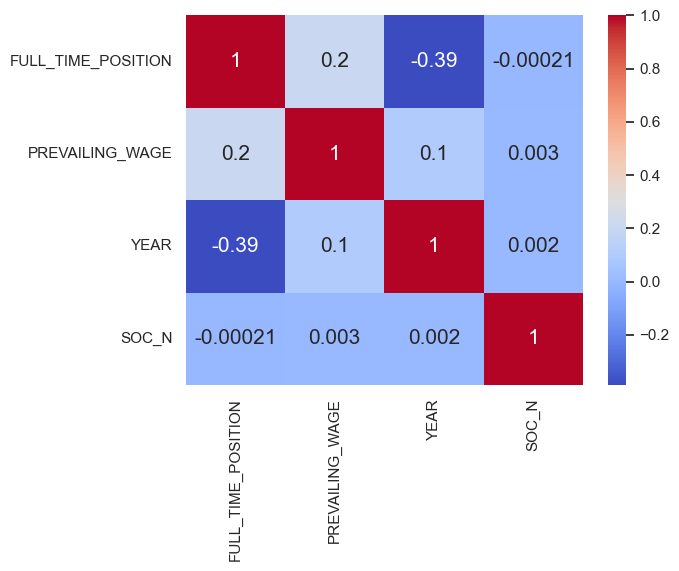

In [46]:
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", annot_kws={"size":15})

In [47]:
data.columns

Index(['CASE_STATUS', 'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR',
       'SOC_N'],
      dtype='object')

## Dividing the data into Independent and dependent variables

In [48]:

x = data.drop(['CASE_STATUS'], axis=1) # Independent variables
y = data['CASE_STATUS'] # Dependent variables


# Train-Test Split

### Splitting the data into train and test

In [49]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [50]:
x.columns

Index(['FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'SOC_N'], dtype='object')

## 2) Model Building

### Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)


In [52]:
#training the model
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [53]:
#test the model
pred1=rf.predict(x_test)

In [54]:
pred1

array(['CERTIFIED', 'CERTIFIED', 'CERTIFIED', ..., 'CERTIFIED',
       'CERTIFIED', 'CERTIFIED'], dtype=object)

In [55]:
x_test

,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,SOC_N
520002,0,61818.0,2016.0,2
1128791,1,54018.0,2015.0,2
900630,1,30014.0,2015.0,2
1362279,1,66082.0,2014.0,2
1691055,1,54995.0,2014.0,2
...,...,...,...,...
108212,0,59717.0,2016.0,2
1821115,1,78250.0,2013.0,2
826367,1,62754.0,2015.0,2
573076,0,50502.4,2016.0,2


In [56]:
y_test

520002     CERTIFIED
1128791    CERTIFIED
900630     CERTIFIED
1362279    CERTIFIED
1691055    CERTIFIED
             ...    
108212     CERTIFIED
1821115    CERTIFIED
826367     CERTIFIED
573076     WITHDRAWN
1164132    CERTIFIED
Name: CASE_STATUS, Length: 899974, dtype: object

In [57]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,pred1)

0.8681361906010618

In [58]:
confusion_matrix(y_test,pred1)

array([[774182,   5554,   3407,      0,      0,   1315],
       [ 54540,   5736,    238,      0,      0,    197],
       [ 26003,    306,   1110,      0,      0,    126],
       [     1,      0,      0,      0,      0,      0],
       [     5,      0,      0,      0,      0,      1],
       [ 26130,    684,    167,      0,      0,    272]], dtype=int64)

In [59]:
print(classification_report(y_test,pred1))

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                    precision    recall  f1-score   support

                                         CERTIFIED       0.88      0.99      0.93    784458
                               CERTIFIED-WITHDRAWN       0.47      0.09      0.16     60711
                                            DENIED       0.23      0.04      0.07     27545
                                       INVALIDATED       0.00      0.00      0.00         1
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED       0.00      0.00      0.00         6
                                         WITHDRAWN       0.14      0.01      0.02     27253

                                          accuracy                           0.87    899974
                                         macro avg       0.29      0.19      0.20    899974
                                      weighted avg       0.81      0.87      0.82    899974



C:\Users\ramya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
import pickle
pickle.dump(rf,open('Visarf.pkl','wb'))

In [61]:
model = pickle.load(open('Visarf.pkl', 'rb'))

In [62]:
print(model.predict([[1,30014.0,2015.0,2]]))

['CERTIFIED']


C:\Users\ramya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [63]:
print(model.predict([[1,70533.0,2015.0,2]]))

['CERTIFIED']


C:\Users\ramya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [64]:
print(model.predict([[0,61818.0,2016.0,2]]))

['CERTIFIED']


C:\Users\ramya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [65]:
print(model.predict([[1,54995.0,2014.0,2]]))

['CERTIFIED']


C:\Users\ramya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
